# From straight beams to frames

A frame is obtained by assembling several straight beams with different orientations.
Different from the case of classes, the beams are clamped one to each other (and not simply joined).

The straight beam model illustrated in the `01-LinearBeam` notebook should be extended by including the possible different orientation of each element of the frame. This requires to consider a local and a global coordinate system.

The file `frame.py` contains the class `LinearFrame` proving a basic implementation of the matrix model of a linear frame. We will use it in this notebook by importing the content of the `frame.py` file (which consitutes a `python` module).

In [21]:
from frame import *

In [22]:
%matplotlib inline  
from sympy.interactive import printing
printing.init_printing()

## Straight beam

Let us first consider a straight beam, and show how we can use the `LinearFrame` class to solve a beam problem discretised into several elements, as in the `01-LinearBeam` notebook.

We can define the frame as a set of nodes and elements, and start by plotting it

Frame with
4 elements
5 nodes
15 dofs


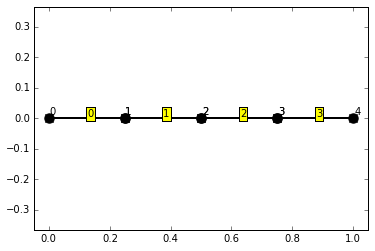

In [6]:
nodes = np.array([[ 0.  ,  0.  ],
       [ 0.25,  0.  ],
       [ 0.5 ,  0.  ],
       [ 0.75,  0.  ],
       [ 1.  ,  0.  ]])

elements = np.array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4]])

frame = LinearFrame(nodes,elements)   

frame.plot_with_label()

We set the stiffness, loading (distributed force per unit line), bcs

In [7]:
ne = frame.nelements
ndof = frame.ndof
EI = np.ones(ne)*1.
ES = np.ones(ne)*100.
f_x = 0*np.ones(4)
f_y = -10*np.ones(4)
frame.set_distributed_loads(f_x, f_y)
frame.set_stiffness(EI, ES)
blocked_dof = np.array([0, 1, 2, ndof-3, ndof-2, ndof-1])
bc_values = np.array([0, 0, 0, 0, 0, 0])

Hence, we use the dedicated functions to assemble the linear system and impose bcs

In [9]:
F = frame.assemble_F()
K = frame.assemble_K()
Kbc, Fbc = frame.bc_apply(K,F,blocked_dof,bc_values)

Finally we solve and represent the solution

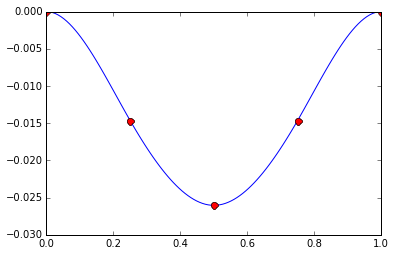

In [14]:
Usol = np.linalg.solve(Kbc,Fbc)
frame.set_displacement(Usol)
#frame.plot_with_label()
frame.plot_displaced()

## A simple frame

Frame with
2 elements
3 nodes
9 dofs


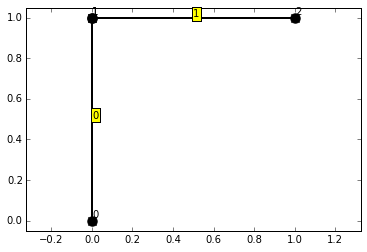

In [15]:
nodes = np.array([[ 0.  ,  0.  ],
                    [ 0.,  1.  ],
                    [ 1.,  1.  ]
                 ])
elements = np.array([[0, 1],[1,2]])

frame = LinearFrame(nodes,elements)   

frame.plot_with_label()

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.25000000e-01
  -6.93889390e-18  -1.66666667e-01   1.25000000e-01  -1.66666667e-01
  -1.66666667e-01]


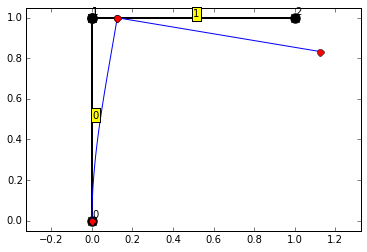

In [17]:
ne = frame.nelements
# inputs
EI = np.ones(ne)*1.
ES = np.ones(ne)*100.
f_y = np.array([0.,0.])
f_x = np.array([1.,0.])
blocked_dof = np.array([0, 1, 2])
bc_values = np.array([0, 0, 0])
frame.set_stiffness(EI, ES)
frame.set_distributed_loads(f_x, -.5*f_y)
# Assemble
F = frame.assemble_F()
K = frame.assemble_K()
# Impose bcs
Kbc, Fbc = frame.bc_apply(K,F,blocked_dof,bc_values)
# Solve
Usol = np.linalg.solve(Kbc,Fbc)
# Plot 
print(Usol)
frame.set_displacement(Usol)
frame.plot_with_label()
frame.plot_displaced()

We can note the use of the rotation from the local to global coordinate systems in the different steps inside the program (e.g. assembling). 
The rotation matrix allowing to pass a vector (e.g. local displacement) from the local to the global coordinate system is

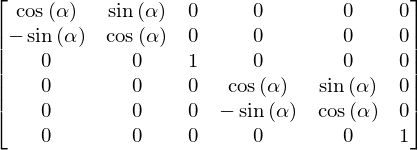

In [17]:
alpha = sp.Symbol('alpha')
frame.rotation_matrix(alpha)

where $\alpha$ is the orientation angle of an element

## Exercise 1

Use the program to solve this problem
$$
E = 10^4 MPa, \quad I = 10^3  mm^4,\quad S = 10 mm^2\quad L = 100 mm\quad P= 10N\quad w=0.24N/mm
$$
You can verify against the solution provided below

![alt text](figures/ex_frame_1.png)
![alt text](figures/ex_frame_1_sol.png)

## Exercice 2

The Young modulus of the silicon is approximately $E=1300$ KPa. 
The cross section of the beams have a height $h=7.5$ mm and a width $b=20$ mm. 
The total width of the frame is $55$ mm.
The length of the upper posts is $60$ mm.
The length of the lower posts is $45$ mm.
The frame is fixed in the soil.

The mass density is $\rho = 1100 kg/m^3$  

Can you predict what is the mass that is hanged in the middle of the upper beam?

![alt text](figures/frame-exp.jpg)

## Exercice 3

* Implement functions to extract the value of the normal force in each element

* Implement functions to plot N,T,M in each element


## References

You find below few references freely available online as pdfs:

* http://joegattas.com/wp-content/uploads/2015/08/3340-Lectures-7-to-12-S1-2015.pdf
* http://www.facweb.iitkgp.ernet.in/~baidurya/CE21004/online_lecture_notes/m4l30.pdf
* http://people.duke.edu/~hpgavin/cee421/
* http://people.duke.edu/~hpgavin/cee421/frame-element.pdf